In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn import svm 
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)
from util import *


train_split=0.7 # fraction of the data used in a training set

%matplotlib inline
%load_ext autoreload
%autoreload 2
######################################################################
#################### Load raw TADPOLE Data COMPLETE. ##########################
######################################################################
biomarkers = [
                'FDG', 'AV45',
                'ABETA_UPENNBIOMK9_04_19_17', 'TAU_UPENNBIOMK9_04_19_17', 'PTAU_UPENNBIOMK9_04_19_17',
                'Hippocampus', 'WholeBrain', 'Entorhinal', 'MidTemp',
                'CEREBELLUMGREYMATTER_UCBERKELEYAV45_10_17_16',
                'WHOLECEREBELLUM_UCBERKELEYAV45_10_17_16',
                'ERODED_SUBCORTICALWM_UCBERKELEYAV45_10_17_16',
                'FRONTAL_UCBERKELEYAV45_10_17_16',
                'CINGULATE_UCBERKELEYAV45_10_17_16',
                'PARIETAL_UCBERKELEYAV45_10_17_16',
                'TEMPORAL_UCBERKELEYAV45_10_17_16',
                'SUMMARYSUVR_WHOLECEREBNORM_UCBERKELEYAV45_10_17_16',
                'SUMMARYSUVR_WHOLECEREBNORM_1.11CUTOFF_UCBERKELEYAV45_10_17_16',
                'SUMMARYSUVR_COMPOSITE_REFNORM_UCBERKELEYAV45_10_17_16',
                'SUMMARYSUVR_COMPOSITE_REFNORM_0.79CUTOFF_UCBERKELEYAV45_10_17_16',
                'BRAINSTEM_UCBERKELEYAV45_10_17_16',
                'BRAINSTEM_SIZE_UCBERKELEYAV45_10_17_16',
                'VENTRICLE_3RD_UCBERKELEYAV45_10_17_16',
                'VENTRICLE_3RD_SIZE_UCBERKELEYAV45_10_17_16',
                'VENTRICLE_4TH_UCBERKELEYAV45_10_17_16',
                'VENTRICLE_4TH_SIZE_UCBERKELEYAV45_10_17_16',
                'VENTRICLE_5TH_UCBERKELEYAV45_10_17_16',
                'VENTRICLE_5TH_SIZE_UCBERKELEYAV45_10_17_16',
                'CC_ANTERIOR_UCBERKELEYAV45_10_17_16',
                'CC_ANTERIOR_SIZE_UCBERKELEYAV45_10_17_16',
                'CC_CENTRAL_UCBERKELEYAV45_10_17_16',
                'CC_CENTRAL_SIZE_UCBERKELEYAV45_10_17_16',
                'CC_MID_ANTERIOR_UCBERKELEYAV45_10_17_16',
                'CC_MID_ANTERIOR_SIZE_UCBERKELEYAV45_10_17_16',
                'CC_MID_POSTERIOR_UCBERKELEYAV45_10_17_16',
                'CC_MID_POSTERIOR_SIZE_UCBERKELEYAV45_10_17_16',
                'CC_POSTERIOR_UCBERKELEYAV45_10_17_16',
                'CC_POSTERIOR_SIZE_UCBERKELEYAV45_10_17_16',
                'CSF_UCBERKELEYAV45_10_17_16',
                'CSF_SIZE_UCBERKELEYAV45_10_17_16',
                'CTX_LH_BANKSSTS_UCBERKELEYAV45_10_17_16',
                'CTX_LH_BANKSSTS_SIZE_UCBERKELEYAV45_10_17_16',
                'CTX_LH_CAUDALANTERIORCINGULATE_UCBERKELEYAV45_10_17_16',
                'CTX_LH_CAUDALANTERIORCINGULATE_SIZE_UCBERKELEYAV45_10_17_16',
                'CTX_LH_CAUDALMIDDLEFRONTAL_UCBERKELEYAV45_10_17_16',
                'CTX_LH_CAUDALMIDDLEFRONTAL_SIZE_UCBERKELEYAV45_10_17_16',
                'CTX_LH_CUNEUS_UCBERKELEYAV45_10_17_16',
                'CTX_LH_CUNEUS_SIZE_UCBERKELEYAV45_10_17_16',
                'CTX_LH_ENTORHINAL_UCBERKELEYAV45_10_17_16',
                'CTX_LH_ENTORHINAL_SIZE_UCBERKELEYAV45_10_17_16',
                'CTX_LH_FRONTALPOLE_UCBERKELEYAV45_10_17_16',
                'CTX_LH_FRONTALPOLE_SIZE_UCBERKELEYAV45_10_17_16',
                'CTX_LH_FUSIFORM_UCBERKELEYAV45_10_17_16',
                'CTX_LH_FUSIFORM_SIZE_UCBERKELEYAV45_10_17_16',
                'CTX_LH_INFERIORPARIETAL_UCBERKELEYAV45_10_17_16',
                'CTX_LH_INFERIORPARIETAL_SIZE_UCBERKELEYAV45_10_17_16',
                'CTX_LH_INFERIORTEMPORAL_UCBERKELEYAV45_10_17_16',
                'CTX_LH_INFERIORTEMPORAL_SIZE_UCBERKELEYAV45_10_17_16',
                'CTX_LH_INSULA_UCBERKELEYAV45_10_17_16',
                'CTX_LH_INSULA_SIZE_UCBERKELEYAV45_10_17_16',
                'CTX_LH_ISTHMUSCINGULATE_UCBERKELEYAV45_10_17_16',
                'CTX_LH_ISTHMUSCINGULATE_SIZE_UCBERKELEYAV45_10_17_16',
                'CTX_LH_LATERALOCCIPITAL_UCBERKELEYAV45_10_17_16',
                'CTX_LH_LATERALOCCIPITAL_SIZE_UCBERKELEYAV45_10_17_16',
                'CTX_LH_LATERALORBITOFRONTAL_UCBERKELEYAV45_10_17_16',
                'CTX_LH_LATERALORBITOFRONTAL_SIZE_UCBERKELEYAV45_10_17_16',
                'CTX_LH_LINGUAL_UCBERKELEYAV45_10_17_16',
                'CTX_LH_LINGUAL_SIZE_UCBERKELEYAV45_10_17_16',
                'CTX_LH_MEDIALORBITOFRONTAL_UCBERKELEYAV45_10_17_16',
                'CTX_LH_MEDIALORBITOFRONTAL_SIZE_UCBERKELEYAV45_10_17_16',
                'CTX_LH_MIDDLETEMPORAL_UCBERKELEYAV45_10_17_16',
                'CTX_LH_MIDDLETEMPORAL_SIZE_UCBERKELEYAV45_10_17_16',
                'CTX_LH_PARACENTRAL_UCBERKELEYAV45_10_17_16',
                'CTX_LH_PARACENTRAL_SIZE_UCBERKELEYAV45_10_17_16',
                'CTX_LH_PARAHIPPOCAMPAL_UCBERKELEYAV45_10_17_16',
                'CTX_LH_PARAHIPPOCAMPAL_SIZE_UCBERKELEYAV45_10_17_16',
            ]

demographic = ['AGE', 'PTGENDER', 'PTEDUCAT', 'PTMARRY','APOE4']

cognitive_test = [ 'ADAS11', 'MMSE', 'RAVLT_immediate', 'CDRSB',]

features = biomarkers + demographic + cognitive_test


tadpole2 = pd.read_csv('TADPOLE_D1_D2.csv',
                       usecols=features + ['DX'],
                       low_memory=False)  
tadpole2 = tadpole2.dropna()
# tadpole2 = collapse_dx(tadpole2)
print('tadpole train labels preprocssed.')
print('NL' , np.sum(tadpole2['DX'] == 'NL'))
print('MCI' , np.sum(tadpole2['DX'] == 'MCI'))
print('Dementia' , np.sum(tadpole2['DX'] == 'Dementia'))
print('NL to MCI' , np.sum(tadpole2['DX'] == 'NL to MCI'))
print('MCI to NL' , np.sum(tadpole2['DX'] == 'MCI to NL'))
print('MCI to Dementia' , np.sum(tadpole2['DX'] == 'MCI to Dementia'))
# print('t2', tadpole2)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
tadpole train labels preprocssed.
NL 122
MCI 196
Dementia 45
NL to MCI 1
MCI to NL 4
MCI to Dementia 8


In [73]:
pipe_dict = {
                0: 'Linear SVM', 1: 'Linear SVM_05', 
                2: 'Polynomial^3 SVM',3: "Polynomial^3 SVM_05",
                4: 'Polynomial^7 SVM_05', 5: 'poly-ovo'
            }
def build_pipe(x_train,y_train,x_test,y_test):
    train_acc, test_acc = [], []
    pipe_dt = Pipeline([('scl', StandardScaler()),
        ('pca', LinearDiscriminantAnalysis(n_components=10)),
        ('clf', LinearSVC(max_iter=1000000, dual=False, C=1.0))])

    pipe_rf = Pipeline([('scl', StandardScaler()),
        ('pca', LinearDiscriminantAnalysis(n_components=10)),
        ('clf', LinearSVC(max_iter=1000000, dual=False, C=.05))])

    pipe_et = Pipeline([('scl', StandardScaler()),
        ('pca', LinearDiscriminantAnalysis(n_components=10)),
        ('clf', svm.SVC(kernel='poly', C=1.0, max_iter=10000000))])

    pipe_ab = Pipeline([('scl', StandardScaler()),
        ('pca', LinearDiscriminantAnalysis(n_components=10)),
        ('clf', svm.SVC(kernel='poly', C=.05, max_iter=10000000))])

    pipe_pd7c5 = Pipeline([('scl', StandardScaler()),
        ('pca', LinearDiscriminantAnalysis(n_components=10)),
        ('clf', svm.SVC(kernel='poly', degree=7, C=.05, max_iter=10000000))])
    
    pipe_v1 = Pipeline([('scl', StandardScaler()),
        ('pca', LinearDiscriminantAnalysis(n_components=10)),
        ('clf', svm.SVC(kernel='poly', C=.05, max_iter=10000000))])
    
    pipelines = [pipe_dt, pipe_rf, pipe_et, pipe_ab, pipe_pd7c5]
    for pipe in pipelines:
        pipe.fit(x_train, y_train)
    print(' ')
    # Compare accuracies
    for idx, val in enumerate(pipelines):
        train_acc.append(val.score(x_train, y_train))
        test_acc.append(val.score(x_test, y_test))
        print('%s pipeline training accuracy: %.3f' % (pipe_dict[idx], train_acc[idx]))
        print('%s pipeline test accuracy: %.3f' % (pipe_dict[idx], test_acc[idx]))

    # Identify the most accurate model on test data
    best_acc = 0.0
    best_clf = 0
    best_pipe = ''
    for idx, val in enumerate(pipelines):
        if val.score(x_test, y_test) > best_acc:
            best_acc = val.score(x_test, y_test)
            best_pipe = val
            best_clf = idx
    print('Classifier with best accuracy: %s' % pipe_dict[best_clf])
    
    return train_acc, test_acc

def bar_chart(train_acc, test_acc):
    # data to plot
    n_groups = len(pipe_dict)
    index_name = [pipe_dict[i] for i in range(n_groups)]
    
    # create plot
    fig, ax = plt.subplots()
    index = np.arange(n_groups)
    bar_width = 0.35
    opacity = 0.8

    rects1 = plt.barh(index, test_acc, bar_width,
                     alpha=opacity,
                     color='b',
                     label='Training Acc')

    rects2 = plt.barh(index + bar_width, train_acc, bar_width,
                     alpha=opacity,
                     color='g',
                     label='Test Acc')

    plt.xlabel('Accuracy')
    plt.ylabel('Methods')
    plt.title('Accuracy Comparison')
    plt.yticks(index + bar_width, index_name)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    plt.tight_layout()
    plt.show()

 
Linear SVM pipeline training accuracy: 0.932
Linear SVM pipeline test accuracy: 0.628
Linear SVM_05 pipeline training accuracy: 0.902
Linear SVM_05 pipeline test accuracy: 0.616
Polynomial^3 SVM pipeline training accuracy: 0.951
Polynomial^3 SVM pipeline test accuracy: 0.674
Polynomial^3 SVM_05 pipeline training accuracy: 0.932
Polynomial^3 SVM_05 pipeline test accuracy: 0.733
Polynomial^7 SVM_05 pipeline training accuracy: 0.941
Polynomial^7 SVM_05 pipeline test accuracy: 0.686
Classifier with best accuracy: Polynomial^3 SVM_05


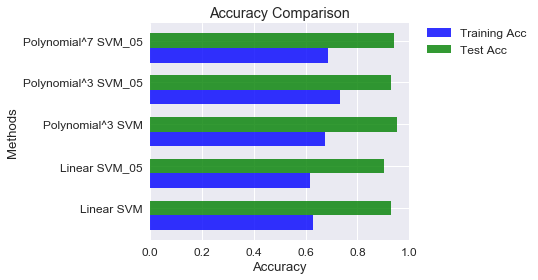

In [74]:
x, y = preprocess_all_feat(tadpole2)
x_train,y_train,x_test,y_test = split_data(x, y, train_split)
train_acc, test_acc = build_pipe(x_train,y_train,x_test,y_test)
bar_chart(train_acc, test_acc)